In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
s=pd.read_csv(r'C:\Users\Lenovo\Downloads\students_adaptability_level_online_education.csv',header=0) # IT IS USED TO ACCESS THE FILE
s

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,6-Mar,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,3-Jan,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Moderate
3,Girl,15-Nov,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Low
1209,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,6-Mar,No,Mobile,Moderate
1210,Boy,15-Nov,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,3-Jan,No,Mobile,Moderate
1211,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,3-Jan,No,Mobile,Low


In [3]:
s.shape  # it tells about how many rows and columns are present

(1213, 14)

In [4]:
s.describe() 

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1211,1213,1213,1213,1213,1213,1213,1211,1213,1213,1213,1213,1209,1213
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,3-Jan,No,Mobile,Moderate
freq,669,376,534,826,909,942,1012,883,701,780,844,1003,1017,630


In [5]:
# describe method tells about the statistics value of the data and by looking to it we can make some conclusion ,
# here we can see that the count of the given statistical columns are same so we can say that there is  missing values in the given data.

In [6]:
s.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [7]:
s.isnull().sum()  # it will tells us about the missing values in the data

Gender                 2
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    2
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 4
Adaptivity Level       0
dtype: int64

In [8]:
s.dropna(inplace=True)    # here we droping the missing values

In [9]:
for i in s.columns:          # here we are checking the unique values present in each column
    print({i:s[i].unique()})

{'Gender': array(['Boy', 'Girl'], dtype=object)}
{'Age': array(['21-25', '16-20', '15-Nov', '26-30', '10-Jun', '5-Jan'],
      dtype=object)}
{'Education Level': array(['University', 'College', 'School'], dtype=object)}
{'Institution Type': array(['Non Government', 'Government'], dtype=object)}
{'IT Student': array(['No', 'Yes'], dtype=object)}
{'Location': array(['Yes', 'No'], dtype=object)}
{'Load-shedding': array(['Low', 'High'], dtype=object)}
{'Financial Condition': array(['Mid', 'Poor', 'Rich'], dtype=object)}
{'Internet Type': array(['Wifi', 'Mobile Data'], dtype=object)}
{'Network Type': array(['4G', '3G', '2G'], dtype=object)}
{'Class Duration': array(['6-Mar', '3-Jan', '0'], dtype=object)}
{'Self Lms': array(['No', 'Yes'], dtype=object)}
{'Device': array(['Tab', 'Mobile', 'Computer'], dtype=object)}
{'Adaptivity Level': array(['Moderate', 'Low', 'High'], dtype=object)}


In [10]:
# so after checking unique values we can clearly see there are errors present in class duration ,age columns so we have to rectify that.

In [11]:
s['Class Duration'].replace({'3-Jan':'1 to 3','6-Mar':'3 to 6'},inplace=True)  # here we are making correction in the data

In [12]:
s['Age'].replace({'5-Jan':'1 to 5','10-Jun':'6 to 10','15-Nov':'11 to 15'},inplace=True)

In [13]:
import matplotlib.pyplot as mp   # these are the library used for data visualization
import seaborn as sb       

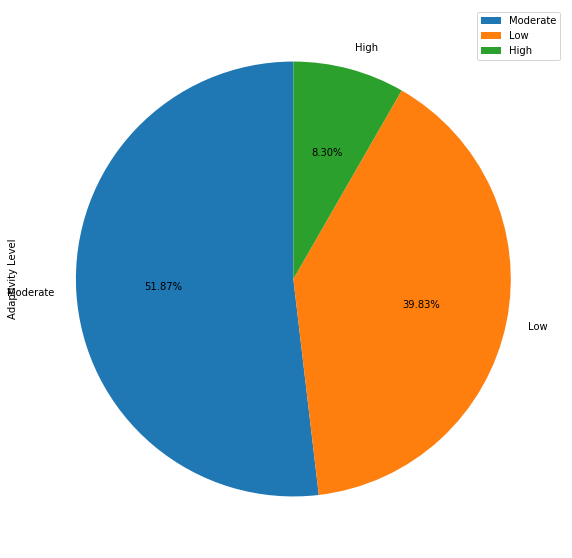

In [14]:
mp.figure(figsize=(15,10))
s['Adaptivity Level'].value_counts().plot.pie(startangle=90,autopct='%1.2f%%')
mp.legend()

In [15]:
# we can clearly see that there are three levels present high, moderate,low and almost 90 % od data belongs two class moderate and low

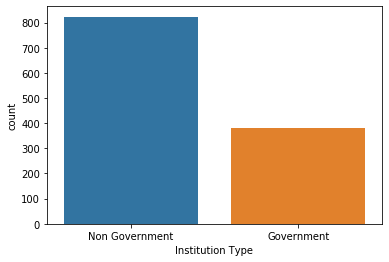

In [16]:
sb.countplot(x='Institution Type',data=s)


In [17]:
# we can see that most of the data points belongs to non government institute

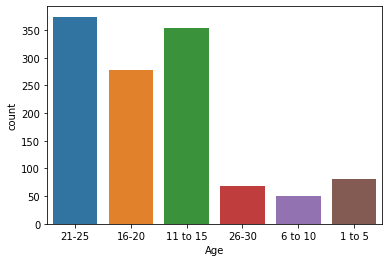

In [18]:
sb.countplot(x='Age',data=s)

In [19]:
# we can see the age of most of the data points is betn 11 to 25

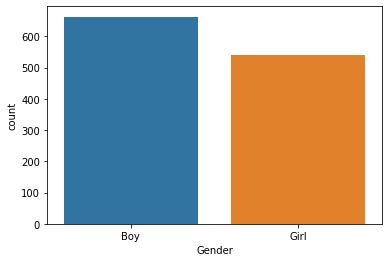

In [20]:
sb.countplot(x='Gender',data=s)

In [21]:
# we have almost equal data points of both boys and girls

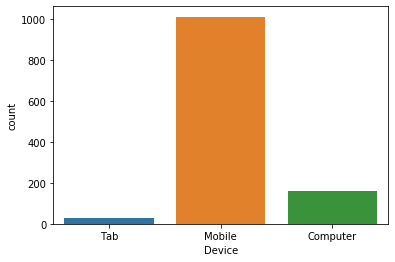

In [22]:
sb.countplot(x='Device',data=s)

In [23]:
# most of the student are using mobile device so it is not going to help in training the model so we can drop this column

In [24]:
pd.crosstab(s['Adaptivity Level'],s['Gender'],margins=True,margins_name='Total') #A crosstab is a tabular representation of data that shows the relationship between two or more variables.

Gender,Boy,Girl,Total
Adaptivity Level,,,
High,71,29,100
Low,245,235,480
Moderate,347,278,625
Total,663,542,1205


In [25]:
# From these we can say that boys adaptive level are high as compared to girls 

In [26]:
pd.crosstab(s['Adaptivity Level'],s['Financial Condition'],margins=True,margins_name='Total')

Financial Condition,Mid,Poor,Rich,Total
Adaptivity Level,,,,
High,36,22,42,100
Low,341,129,10,480
Moderate,501,91,33,625
Total,878,242,85,1205


In [27]:
# From these we can say that financial condition creates a difference in adaptive level bcoz adaptive level of rich is quite good

In [28]:
pd.crosstab(s['Adaptivity Level'],s['IT Student'],margins=True,margins_name='Total')

IT Student,No,Yes,Total
Adaptivity Level,,,
High,67,33,100
Low,391,89,480
Moderate,443,182,625
Total,901,304,1205


In [29]:
# From these we can say that IT STUDENT creates a difference in adaptive level bcoz adaptive level of IT STUDENT is quite good

In [30]:
pd.crosstab(s['Adaptivity Level'],s['Load-shedding'],margins=True,margins_name='Total')

Load-shedding,High,Low,Total
Adaptivity Level,,,
High,13,87,100
Low,100,380,480
Moderate,88,537,625
Total,201,1004,1205


In [31]:
# From these we can say that Load-shedding  creates a difference in adaptive level bcoz adaptive level of student where load shedding is low is quite good

In [32]:
a=pd.crosstab(s['Adaptivity Level'],[s['Age'],s['Education Level']],margins=True,margins_name='Total')
a

Age              1 to 5 11 to 15   16-20                     21-25             \
Education Level  School   School College School University College University   
Adaptivity Level                                                                
High                  0       28       3      2          0       0         38   
Low                  17      120     106     21         17      14        125   
Moderate             64      205      88     22         19       8        189   
Total                81      353     197     45         36      22        352   

Age                   26-30 6 to 10 Total  
Education Level  University  School        
Adaptivity Level                           
High                     12      17   100  
Low                      36      24   480  
Moderate                 20      10   625  
Total                    68      51  1205

In [33]:
s.drop(['Device'],axis=1,inplace=True)

In [34]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in s:
    s[x]=le.fit_transform(s[x])
    """
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
     """

In [35]:
s.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2
1,1,3,2,1,0,1,0,0,0,2,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,2
3,1,1,1,1,0,1,1,0,0,2,1,0,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1


In [36]:
s.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Adaptivity Level       0
dtype: int64

In [37]:
s.dtypes

Gender                 int32
Age                    int32
Education Level        int32
Institution Type       int32
IT Student             int32
Location               int32
Load-shedding          int32
Financial Condition    int32
Internet Type          int32
Network Type           int32
Class Duration         int32
Self Lms               int32
Adaptivity Level       int32
dtype: object

In [38]:
X=s.values[:,0:-1]
Y=s.values[:,-1]

In [39]:
from sklearn.preprocessing import StandardScaler  # here we are scaling the data

scaler=StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

print(X)

[[-0.90415498  0.72502676  1.11241884 ...  0.72340921  1.73744858
  -0.45940753]
 [ 1.10600508  0.72502676  1.11241884 ...  0.72340921 -0.08626705
   2.17671662]
 [ 1.10600508 -0.10151746 -1.65713632 ...  0.72340921 -0.08626705
  -0.45940753]
 ...
 [-0.90415498 -0.92806169 -0.27235874 ... -1.21803422 -0.08626705
  -0.45940753]
 [ 1.10600508 -0.10151746 -1.65713632 ...  0.72340921 -0.08626705
  -0.45940753]
 [ 1.10600508 -0.92806169 -0.27235874 ... -1.21803422 -0.08626705
  -0.45940753]]


In [40]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(843, 12)
(362, 12)
(843,)
(362,)


# KNN

In [42]:
# predicting using the Kneighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')
# euclidean,manhatten,minkowski
# fit the model on the data and predict the values
model_knn.fit(X_train,Y_train)

Y_pred=model_knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (2, 1), (1, 1), (2, 2), (2, 1), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (1, 1), (1, 2), (1, 1), (1, 1), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 1), (2, 2), (1, 1), (2, 2), (2, 2), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (2, 2), (2, 2), (1, 2), (0, 2), (2, 1), (0, 0), (2, 2), (2, 1), (2, 2), (1, 1), (1, 2), (2, 2), (2, 2), (2, 2), (2, 2), (1, 1), (1, 2), (1, 2), (2, 1), (2, 2), (1, 1), (0, 2), (2, 1), (2, 2), (2, 2), (1, 1), (0, 2), (1, 1), (1, 1), (2, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (1, 1), (2, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (1, 2), (1, 1), (2, 2), (1, 1), (1, 2), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (0, 0), (2, 2), (2, 1), (2, 2), (2, 2), (2, 2), (0, 1), (0, 2), (1, 1), (1, 1), (1, 1), (2, 2), (1, 2), (2, 2), (1, 2),

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 10   6  14]
 [  0  78  49]
 [  2  38 165]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.33      0.48        30
           1       0.64      0.61      0.63       127
           2       0.72      0.80      0.76       205

    accuracy                           0.70       362
   macro avg       0.73      0.58      0.62       362
weighted avg       0.70      0.70      0.69       362

Accuracy of the model:  0.6988950276243094


# SVM

In [62]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=10,gamma=0.1,probability=True)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 

In [63]:
svc_model.score(X_train,Y_train) #  WE CAN CLEARLY SEE THAT MODEL IS NOT OVERFITTED OR UNDERFITTED MODEL

0.9122182680901542

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 23   0   7]
 [  7 103  17]
 [ 11  16 178]]
Classification report: 
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        30
           1       0.87      0.81      0.84       127
           2       0.88      0.87      0.87       205

    accuracy                           0.84       362
   macro avg       0.77      0.82      0.79       362
weighted avg       0.85      0.84      0.84       362

Accuracy of the model:  0.8397790055248618


# DECISION TREE

In [50]:
from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier(criterion='gini',random_state=10)
#min_sample_leaf,min_samples_split,max_depth,max_features [PRUNING HYPERPARAMETERS]
d_model.fit(X_train,Y_train)
Y_pred=d_model.predict(X_test)
print(list(Y_pred))

[2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 1, 

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[ 22   3   5]
 [  5 114   8]
 [  6  23 176]]
Classification report: 
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        30
           1       0.81      0.90      0.85       127
           2       0.93      0.86      0.89       205

    accuracy                           0.86       362
   macro avg       0.80      0.83      0.82       362
weighted avg       0.87      0.86      0.86       362

Accuracy of the model:  0.861878453038674


In [52]:
d_model.score(X_train,Y_train)  #  WE CAN CLEARLY SEE THAT MODEL IS NOT OVERFITTED OR UNDERFITTED MODEL

0.9145907473309609

# RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_r=RandomForestClassifier(n_estimators=100,bootstrap=True,n_jobs=-1)
model_r.fit(X_train,Y_train)
Y_pred=model_r.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print(' classification_report:')
print( classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print('accuracy_score',acc)

[[ 23   0   7]
 [  5 112  10]
 [  6  22 177]]
 classification_report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        30
           1       0.84      0.88      0.86       127
           2       0.91      0.86      0.89       205

    accuracy                           0.86       362
   macro avg       0.81      0.84      0.82       362
weighted avg       0.87      0.86      0.86       362

accuracy_score 0.861878453038674


In [55]:
model_r.score(X_train,Y_train) #  WE CAN CLEARLY SEE THAT MODEL IS NOT OVERFITTED OR UNDERFITTED MODEL

0.9145907473309609

SO AFTER APPLYING VARIOUS ML ALGORITHM WE CAN SEE RANDOM FOREST IS GIVING US A GOOD ACCURACY WITH A DESCENT RECALL VALUE , HENCE 
FOR ANY FUTURE PREDICTION WE WILL USE RANDOM FOREST MODEL.